In [1]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

from src.preprocessing.categorisations.income_categories import emissions_df

                                     OLS Regression Results                                    
Dep. Variable:     Emissions.Production.CO2.Total_2018   R-squared:                       0.695
Model:                                             OLS   Adj. R-squared:                  0.692
Method:                                  Least Squares   F-statistic:                     205.4
Date:                                 Sat, 09 Dec 2023   Prob (F-statistic):           5.95e-25
Time:                                         08:36:09   Log-Likelihood:                -730.03
No. Observations:                                   92   AIC:                             1464.
Df Residuals:                                       90   BIC:                             1469.
Df Model:                                            1                                         
Covariance Type:                             nonrobust                                         
                                        

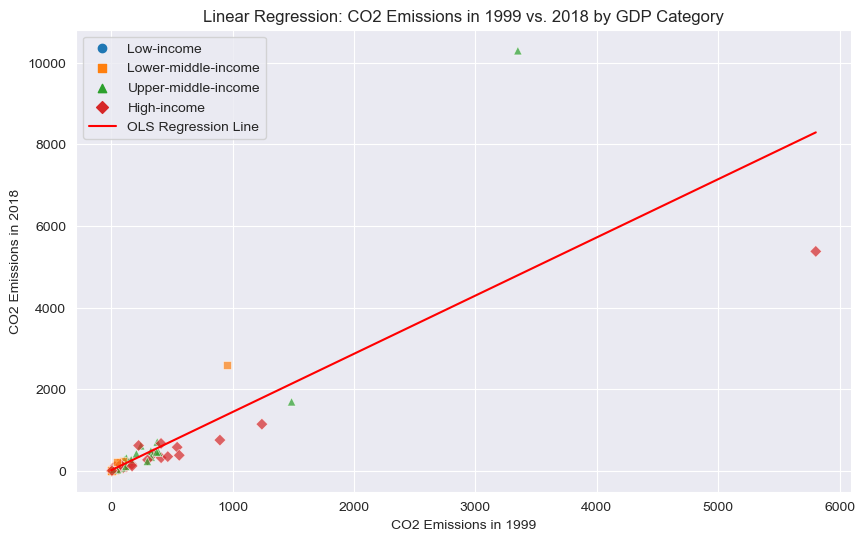

In [11]:
# Specify the years
year1 = 1999
year2 = 2018

def plot_time2time_regression(year_1, year_2):
    # Filter and merge data
    merged_data = pd.merge(
        emissions_df[emissions_df['Year'] == year_1][['Country.Code', 'Emissions.Production.CO2.Total', 'GDP_Category']],
        emissions_df[emissions_df['Year'] == year_2][['Country.Code', 'Emissions.Production.CO2.Total']],
        on='Country.Code',
        suffixes=('_' + str(year_1), '_' + str(year_2))
    ).dropna()

    # Perform linear regression
    X = sm.add_constant(merged_data['Emissions.Production.CO2.Total_' + str(year_1)])
    y = merged_data['Emissions.Production.CO2.Total_' + str(year_2)]
    model = sm.OLS(y, X).fit()

    # Print regression summary
    print(model.summary())

    # Scatter plot with different markers for each GDP category using seaborn
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x='Emissions.Production.CO2.Total_' + str(year_1),
        y='Emissions.Production.CO2.Total_' + str(year_2),
        hue='GDP_Category',
        style='GDP_Category',
        markers={'Low-income': 'o', 'Lower-middle-income': 's', 'Upper-middle-income': '^', 'High-income': 'D'},
        data=merged_data,
        alpha=0.7
    )

    # Plot regression line
    sns.lineplot(
        x=merged_data['Emissions.Production.CO2.Total_' + str(year_1)],
        y=model.predict(X),
        color='red',
        label='OLS Regression Line'
    )

    plt.xlabel(f'CO2 Emissions in {year_1}')
    plt.ylabel(f'CO2 Emissions in {year_2}')
    plt.title(f'Linear Regression: CO2 Emissions in {year_1} vs. {year_2} by GDP Category')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_time2time_regression(year1, year2)

/opt/homebrew/Caskroom/mambaforge/base/envs/stats/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


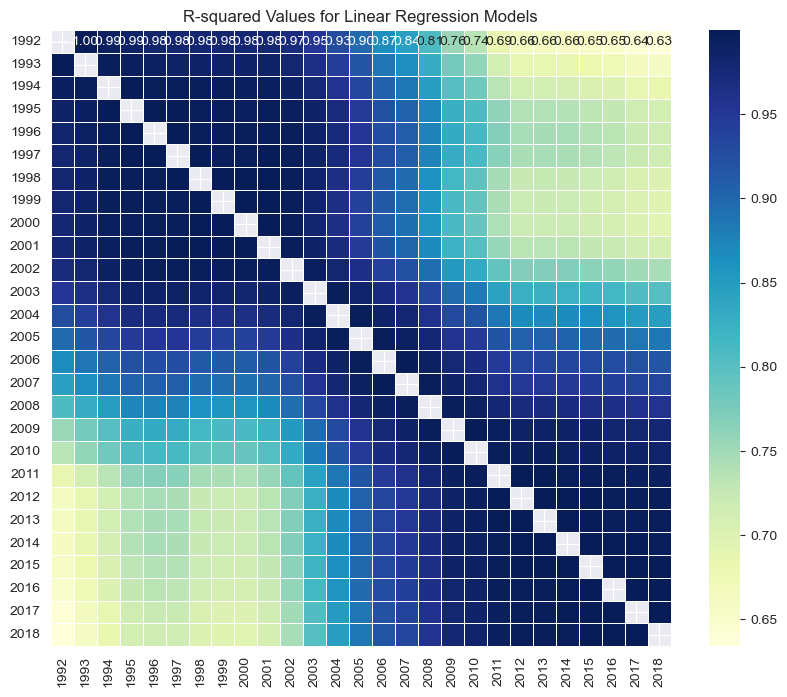

In [4]:
# Assuming emissions_df is your DataFrame with the specified columns

# Get unique years in the 'Year' column
years = emissions_df['Year'].unique()

# Create an empty DataFrame to store R-squared values
rsquared_df = pd.DataFrame(index=years, columns=years)

# Loop through all pairs of years
for year_1 in years:
    for year_2 in years:
        if year_1 != year_2:
            # Filter data for the specified years
            data_1 = emissions_df[emissions_df['Year'] == year_1]
            data_2 = emissions_df[emissions_df['Year'] == year_2]

            # Merge data on 'Country.Code' to get emissions for the same countries
            merged_data = pd.merge(data_1[['Country.Code', 'Emissions.Production.CO2.Total', 'GDP_Category']],
                                   data_2[['Country.Code', 'Emissions.Production.CO2.Total']],
                                   on='Country.Code',
                                   suffixes=('_' + str(year_1), '_' + str(year_2)))

            # Drop rows with missing values
            merged_data = merged_data.dropna()

            # Perform linear regression
            X = sm.add_constant(merged_data[f'Emissions.Production.CO2.Total_{year_1}'])
            y = merged_data[f'Emissions.Production.CO2.Total_{year_2}']

            model = sm.OLS(y, X).fit()

            # Store R-squared value in the DataFrame
            rsquared_df.at[year_1, year_2] = model.rsquared

# Convert R-squared values to numeric
rsquared_df = rsquared_df.apply(pd.to_numeric, errors='coerce')

# Draw a heatmap of R-squared values
plt.figure(figsize=(10, 8))
sns.heatmap(rsquared_df, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title('R-squared Values for Linear Regression Models')
plt.show()
